# Zadanie 1

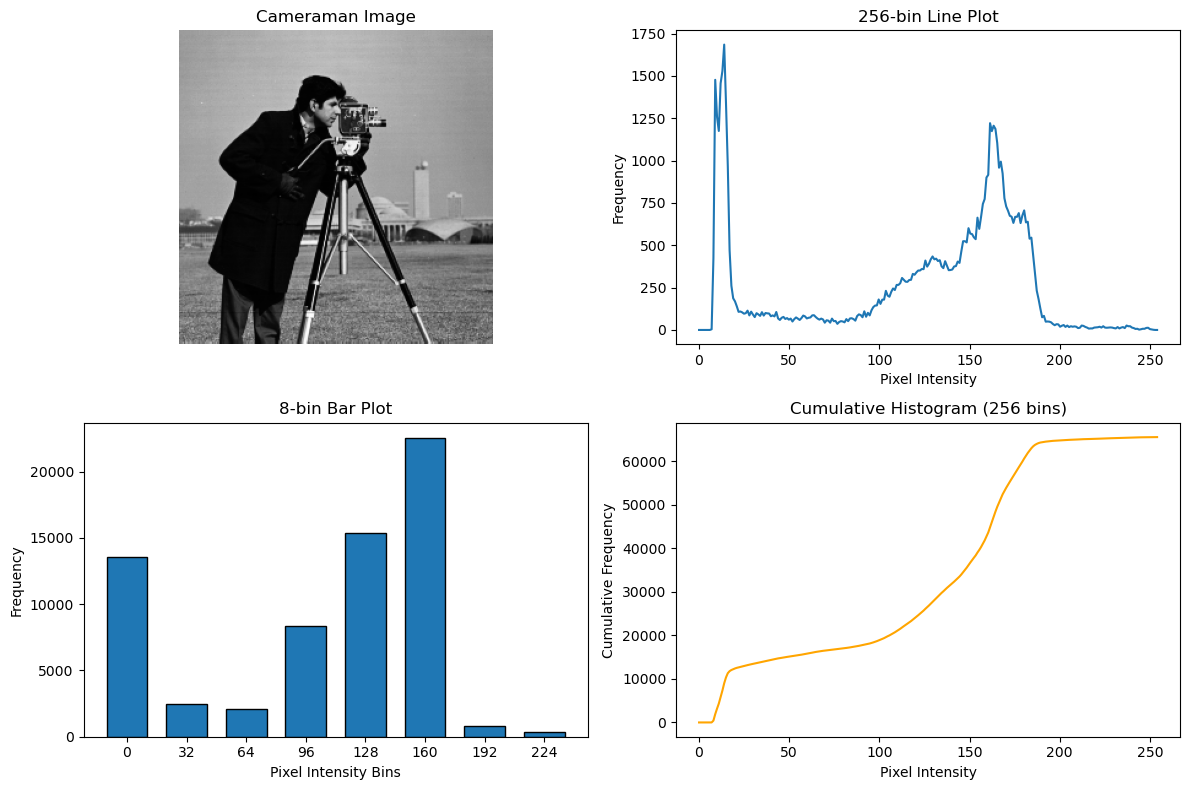

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
from skimage.util.dtype import dtype_range

# Wczytaj obraz
image = skimage.io.imread('images/cameraman.bmp')

# Tworzenie figury z subplotami
plt.figure(figsize=(12, 8))

# Pierwszy subplot: Oryginalny obraz
plt.subplot(2, 2, 1)  # 2 wiersze, 2 kolumny, 1. subplot
plt.imshow(image, cmap='gray')
plt.title('Cameraman Image')
plt.axis('off')

# Tworzenie histogramu 256 kubełków
h_256 = np.histogram(image, bins=256, range=(0, 255))
x_256 = h_256[1][:-1]  # Krawędzie kubełków dla 256 przedziałów
y_256 = h_256[0]       # Liczność dla każdego kubełka

# Tworzenie histogramu 8 kubełków
bins_8 = np.linspace(0, 256, 9)  # Tworzy 8 przedziałów od 0 do 256
h_8 = np.histogram(image, bins=bins_8)
x_8 = h_8[1][:-1]  # Krawędzie kubełków dla 8 przedziałów
y_8 = h_8[0]       # Liczność dla każdego kubełka

# Środek przedziałów dla 8 kubełków
# Drugi subplot: Wykres liniowy histogramu 256 kubełków
plt.subplot(2, 2, 2)  # 2 wiersze, 2 kolumny, 2. subplot
plt.plot(x_256, y_256)
plt.title('256-bin Line Plot')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Trzeci subplot: Wykres słupkowy histogramu 8 kubełków
plt.subplot(2, 2, 3)  # 2 wiersze, 2 kolumny, 3. subplot
bar_width = 255/8 - 10  # Ustaw szerokość słupków
plt.bar(x_8, y_8, width=bar_width, edgecolor='black', align='center')  # Dodajemy krawędzie do słupków
plt.title('8-bin Bar Plot')
plt.xlabel('Pixel Intensity Bins')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 256, 32))  # Ustaw etykiety osi x na 0, 32, 64, ..., 224

# Czwarty subplot: Skumulowany histogram (256 kubełków)
y_cumulative = np.cumsum(y_256)  # Skumulowana suma histogramu 256 kubełków
plt.subplot(2, 2, 4)  # 2 wiersze, 2 kolumny, 4. subplot
plt.plot(x_256, y_cumulative, color='orange')
plt.title('Cumulative Histogram (256 bins)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')

# Dopasowanie layoutu, aby uniknąć nachodzenia
plt.tight_layout()

# Wyświetl wykresy
plt.show()


# Zadanie 2

## a)

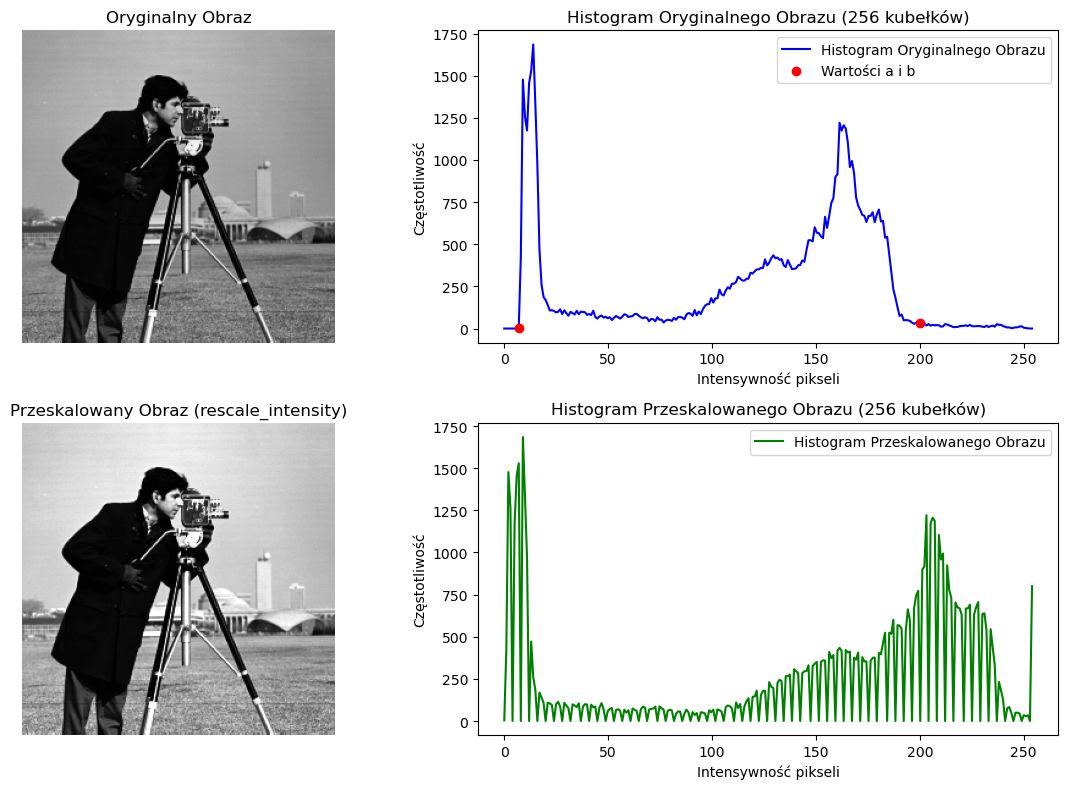

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.exposure

# Wczytaj obraz
image = skimage.io.imread('images/cameraman.bmp')

# Oblicz histogram dla oryginalnego obrazu
h_256 = np.histogram(image, bins=256, range=(0, 255))
x_256 = h_256[1][:-1]  # Krawędzie kubełków dla 256 przedziałów
y_256 = h_256[0]       # Liczność dla każdego kubełka

# Wartości a i b (znalezione na podstawie analizy histogramu)
a = 7   # Przybliżona wartość, gdzie wykres zaczyna wzrastać
b = 200 # Przybliżona wartość, gdzie wykres zaczyna wyraźnie spadać

# Zastosowanie rescale_intensity
rescaled_image = skimage.exposure.rescale_intensity(image, in_range=(a, b))

# Oblicz histogram dla przeskalowanego obrazu
h_rescaled = np.histogram(rescaled_image, bins=256, range=(0, 255))
x_rescaled = h_rescaled[1][:-1]  # Krawędzie kubełków
y_rescaled = h_rescaled[0]       # Liczność

# Tworzenie figure z subplotami (2x2 układ)
plt.figure(figsize=(12, 8))

# Pierwszy subplot: Oryginalny obraz
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Oryginalny Obraz')
plt.axis('off')  # Ukryj osie

# Drugi subplot: Histogram oryginalnego obrazu
plt.subplot(2, 2, 2)
plt.plot(x_256, y_256, label='Histogram Oryginalnego Obrazu', color='blue')
plt.scatter([a, b], [y_256[np.clip(a, 0, 255)], y_256[np.clip(b, 0, 255)]], 
            color='red', zorder=6, label='Wartości a i b')  # Punkty a i b
plt.title('Histogram Oryginalnego Obrazu (256 kubełków)')
plt.xlabel('Intensywność pikseli')
plt.ylabel('Częstotliwość')
plt.legend()

# Trzeci subplot: Przeskalowany obraz
plt.subplot(2, 2, 3)
plt.imshow(rescaled_image, cmap='gray')
plt.title('Przeskalowany Obraz (rescale_intensity)')
plt.axis('off')  # Ukryj osie

# Czwarty subplot: Histogram przeskalowanego obrazu
plt.subplot(2, 2, 4)
plt.plot(x_rescaled, y_rescaled, label='Histogram Przeskalowanego Obrazu', color='green')
plt.title('Histogram Przeskalowanego Obrazu (256 kubełków)')
plt.xlabel('Intensywność pikseli')
plt.ylabel('Częstotliwość')
plt.legend()

# Dopasowanie layoutu, aby wszystko się zmieściło
plt.tight_layout()

# Wyświetl wykresy
plt.show()


### **Jeśli na brzegach są bardzo wysokie słupki oznacza to, że wartość a jest zbyt duża, a wartość b, za mała. Skoryguj te wartości. Wyjaśnij, dlaczego po takiej operacji dla niektórych kubełków histogramu pojawiły się zera?**
**Przeskalowanie:**

Proces reskalowania wprowadza nowe wartości intensywności, co może prowadzić do sytuacji, w której niektóre intensywności nie występują w obrazie po przeskalowaniu. Dlatego wartości histogramu mogą być inne, co skutkuje zerowymi kubełkami.

# b)

## Zmiana skali, potem gammy

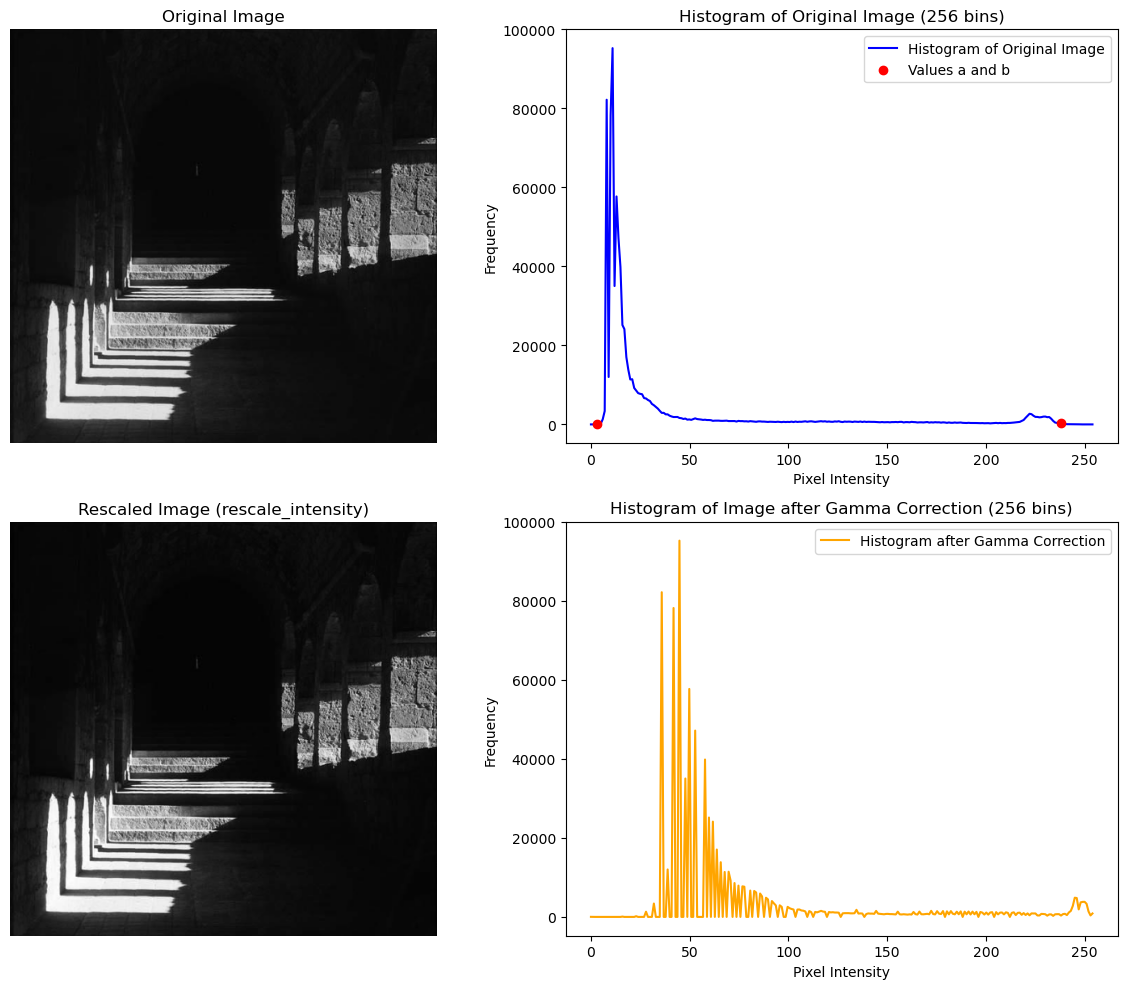

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.exposure
import skimage.io

# Load the image
image = skimage.io.imread('images/dark_image.png')

# Calculate the histogram for the original image
h_256 = np.histogram(image, bins=256, range=(0, 255))
x_256 = h_256[1][:-1]  # Bin edges for 256 bins
y_256 = h_256[0]       # Frequency counts for each bin

# Set values a and b based on histogram analysis
a = 3   # Approximate value
b = 238 # Approximate value

# ----------------------------------
# 1. Change Intensity Scaling
# ----------------------------------
rescaled_image = skimage.exposure.rescale_intensity(image, in_range=(a, b))

# Calculate the histogram for the rescaled image
h_rescaled = np.histogram(rescaled_image, bins=256, range=(0, 255))
x_rescaled = h_rescaled[1][:-1]  # Bin edges
y_rescaled = h_rescaled[0]       # Frequency counts

# ----------------------------------
# Gamma Correction
# ----------------------------------
gamma_value = 0.5  # Gamma < 1 for brightening the lower the gamma the brigher
gamma_corrected_image = skimage.exposure.adjust_gamma(rescaled_image, gamma_value)

# Calculate the histogram for the gamma corrected image
h_gamma = np.histogram(gamma_corrected_image, bins=256, range=(0, 255))
x_gamma = h_gamma[1][:-1]
y_gamma = h_gamma[0]

# Create figure with subplots (2x2 layout)
plt.figure(figsize=(12, 10))

# First subplot: Original image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')  # Hide axes

# Second subplot: Histogram of the original image
plt.subplot(2, 2, 2)
plt.plot(x_256, y_256, label='Histogram of Original Image', color='blue')
plt.scatter([a, b], [y_256[np.clip(a, 0, 255)], y_256[np.clip(b, 0, 255)]], 
            color='red', zorder=6, label='Values a and b')  # Points a and b
plt.title('Histogram of Original Image (256 bins)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

# Third subplot: Rescaled image
plt.subplot(2, 2, 3)
plt.imshow(rescaled_image, cmap='gray')
plt.title('Rescaled Image (rescale_intensity)')
plt.axis('off')  # Hide axes

# Fourth subplot: Histogram after gamma correction
plt.subplot(2, 2, 4)
plt.plot(x_gamma, y_gamma, label='Histogram after Gamma Correction', color='orange')
plt.title('Histogram of Image after Gamma Correction (256 bins)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

# Adjust layout to fit everything
plt.tight_layout()
plt.show()

# Display the image after gamma correction
# plt.figure(figsize=(6, 6))
# plt.imshow(gamma_corrected_image, cmap='gray')
# plt.title(f'Image after Gamma Correction (gamma={gamma_value})')
# plt.axis('off')
# plt.show()


**Stosunek intensywności jest zmieniany w zależności od współczynnika gamma:**

- Gamma > 1: przyciemnia obraz.
- Gamma < 1: rozjaśnia obraz.


## Zmiana gammy, później skali

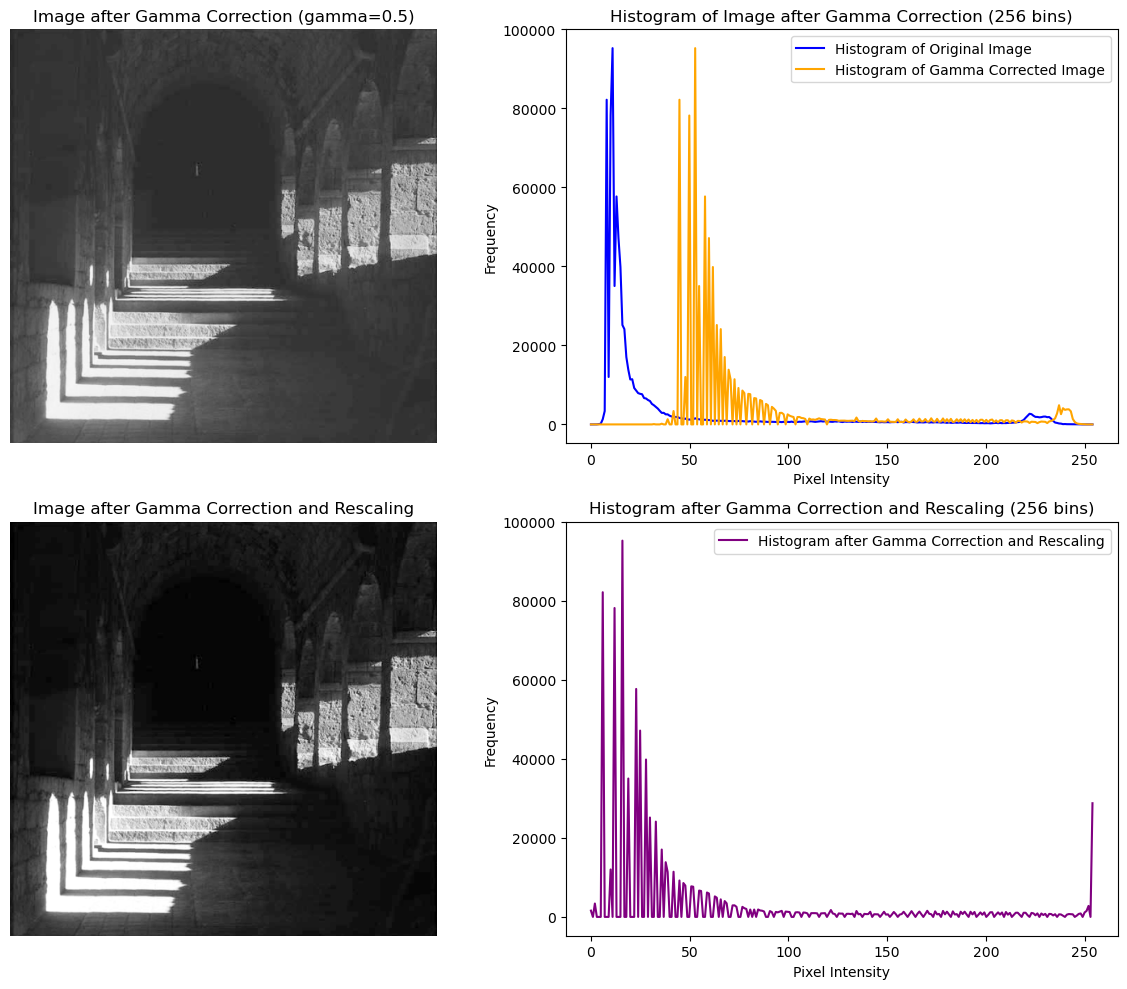

In [35]:
# Create figure with subplots (2x2 layout)

# # First subplot: Original image
# plt.imshow(image, cmap='gray')
# plt.title('Original Image')
# plt.axis('off')  # Hide axes

plt.figure(figsize=(12, 10))
# Second subplot: Histogram of the original image
plt.subplot(2, 2, 2)
plt.plot(x_256, y_256, label='Histogram of Original Image', color='blue')
plt.title('Histogram of Original Image (256 bins)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
# Gamma Correction
gamma_value = 0.5  # Gamma < 1 for brightening
gamma_corrected_image = skimage.exposure.adjust_gamma(image, gamma_value)

# Calculate the histogram for the gamma corrected image
h_gamma = np.histogram(gamma_corrected_image, bins=256, range=(0, 255))
x_gamma = h_gamma[1][:-1]
y_gamma = h_gamma[0]

# Set values a and b based on histogram analysis
a = 40   # Approximate value
b = 238 # Approximate value

# Rescale intensity after gamma correction
rescaled_after_gamma = skimage.exposure.rescale_intensity(gamma_corrected_image, in_range=(a, b))

# Calculate the histogram for the image after gamma correction and rescaling
h_rescaled_after_gamma = np.histogram(rescaled_after_gamma, bins=256, range=(0, 255))
x_rescaled_after_gamma = h_rescaled_after_gamma[1][:-1]
y_rescaled_after_gamma = h_rescaled_after_gamma[0]



# First subplot: Image after gamma correction
plt.subplot(2, 2, 1)
plt.imshow(gamma_corrected_image, cmap='gray')
plt.title(f'Image after Gamma Correction (gamma={gamma_value})')
plt.axis('off')  # Hide axes

# Second subplot: Histogram of gamma corrected image
plt.subplot(2, 2, 2)
plt.plot(x_gamma, y_gamma, label='Histogram of Gamma Corrected Image', color='orange')
plt.title('Histogram of Image after Gamma Correction (256 bins)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

# Third subplot: Image after gamma correction and rescaling
plt.subplot(2, 2, 3)
plt.imshow(rescaled_after_gamma, cmap='gray')
plt.title('Image after Gamma Correction and Rescaling')
plt.axis('off')  # Hide axes

# Fourth subplot: Histogram after gamma correction and rescaling
plt.subplot(2, 2, 4)
plt.plot(x_rescaled_after_gamma, y_rescaled_after_gamma, label='Histogram after Gamma Correction and Rescaling', color='purple')
plt.title('Histogram after Gamma Correction and Rescaling (256 bins)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

# Adjust layout to fit everything
plt.tight_layout()
plt.show()


### Lepsze efekty widoczne są dla wariantu pierwszego

# Zadanie 3

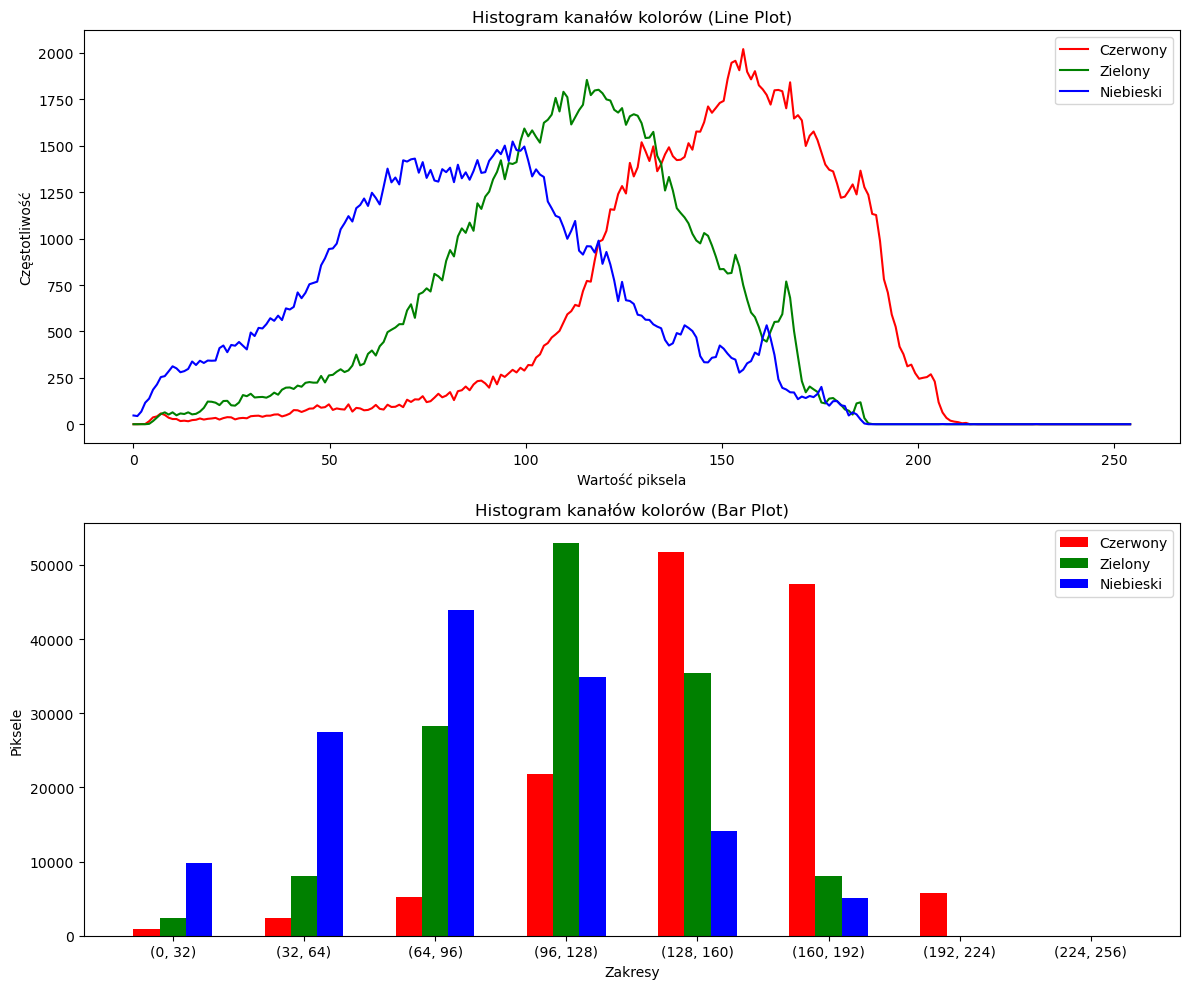

In [14]:
import matplotlib.pyplot as plt
from skimage import data
import numpy as np

# Load the image (use data.coffee() if you want that image instead)
image = data.chelsea()

# Separate the image into R, G, B channels
R = image[:, :, 0].flatten()
G = image[:, :, 1].flatten()
B = image[:, :, 2].flatten()

# Define the bins range
bins_range = [0, 32, 64, 96, 128, 160, 192, 224, 256]

# Calculate the histograms for R, G, B within the given bin ranges
hist_R_bin = np.histogram(R, bins=bins_range)[0]
hist_G_bin = np.histogram(G, bins=bins_range)[0]
hist_B_bin = np.histogram(B, bins=bins_range)[0]

# Calculate full histograms for line plots (256 bins)
hist_R, bins_R = np.histogram(R, bins=256, range=(0, 255))
hist_G, bins_G = np.histogram(G, bins=256, range=(0, 255))
hist_B, bins_B = np.histogram(B, bins=256, range=(0, 255))

# Create the figure with both bar and line plots

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Line plot (first plot)
ax1.plot(bins_R[:-1], hist_R, color='red', label='Czerwony')
ax1.plot(bins_G[:-1], hist_G, color='green', label='Zielony')
ax1.plot(bins_B[:-1], hist_B, color='blue', label='Niebieski')

# Set labels, title, and legend for line plot
ax1.set_xlabel('Wartość piksela')
ax1.set_ylabel('Częstotliwość')
ax1.set_title('Histogram kanałów kolorów (Line Plot)')
ax1.legend()

# Bar plot (second plot)
bar_width = 0.2
x = np.arange(len(bins_range) - 1)

ax2.bar(x - bar_width, hist_R_bin, width=bar_width, color='red', label='Czerwony')
ax2.bar(x, hist_G_bin, width=bar_width, color='green', label='Zielony')
ax2.bar(x + bar_width, hist_B_bin, width=bar_width, color='blue', label='Niebieski')

# Set labels, title, and legend for bar plot
ax2.set_xticks(x)
ax2.set_xticklabels([(bins_range[i], bins_range[i+1]) for i in range(len(bins_range)-1)])
ax2.set_xlabel('Zakresy')
ax2.set_ylabel('Piksele')
ax2.set_title('Histogram kanałów kolorów (Bar Plot)')
ax2.legend()

# Display the plot
plt.tight_layout()
plt.show()


# ZADANIE 4 - Tablica LUT i ręczna zmiana ekspozycji obrazu


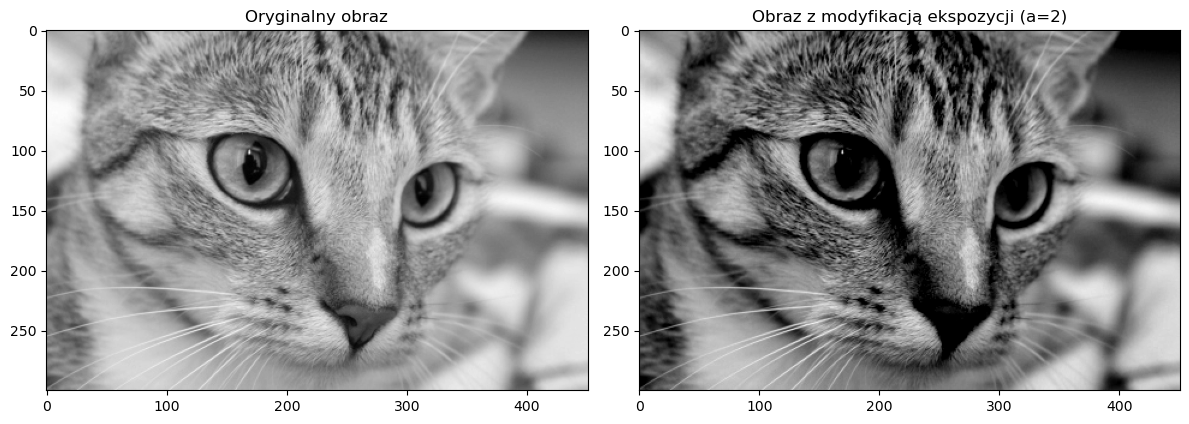

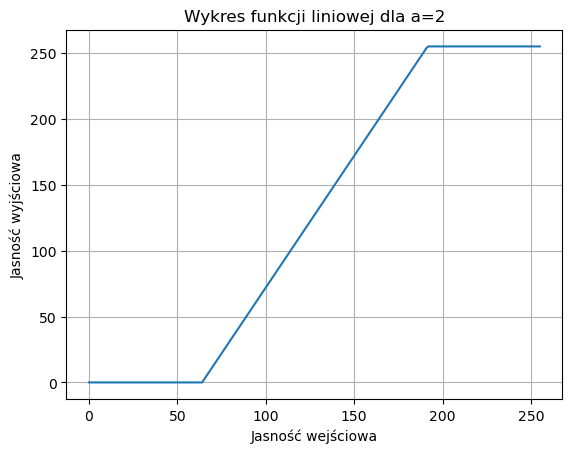

In [37]:
from skimage.util import img_as_ubyte
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray

# Funkcja liniowa do modyfikacji jasności
def linear_function(x, a):
    # Funkcja przechodzi przez punkt (128, 128)
    result = a * (x - 128) + 128
    
    # Ograniczamy wartości do zakresu [0, 255] i zaokrąglamy
    return np.clip(np.round(result), 0, 255)

# Generowanie tablicy LUT dla danego a
def generate_LUT(a):
    return [linear_function(x, a) for x in range(256)]

# Zastosowanie tablicy LUT do obrazu
def apply_LUT(image, LUT):
    # Spłaszczamy obraz do jednowymiarowej tablicy, stosujemy LUT i przekształcamy z powrotem
    return np.array([LUT[pixel] for pixel in image.flatten()]).reshape(image.shape)

# Testowy obraz czarno-biały
image = img_as_ubyte(rgb2gray(data.chelsea()))  # Zamiana obrazu kolorowego na czarno-biały

# Generowanie LUT dla nachylenia a=1.2
a = 2
LUT = generate_LUT(a)

# Zastosowanie LUT do obrazu
new_image = apply_LUT(image, LUT)

# Wyświetlanie oryginalnego i zmodyfikowanego obrazu
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Oryginalny obraz')

ax[1].imshow(new_image, cmap='gray')
ax[1].set_title(f'Obraz z modyfikacją ekspozycji (a={a})')

plt.tight_layout()
plt.show()

# Dodatkowo, można zwizualizować wykres funkcji dla danego nachylenia a
x_vals = np.arange(256)
y_vals = [linear_function(x, a) for x in x_vals]

plt.plot(x_vals, y_vals)
plt.title(f'Wykres funkcji liniowej dla a={a}')
plt.xlabel('Jasność wejściowa')
plt.ylabel('Jasność wyjściowa')
plt.grid(True)
plt.show()
